In [8]:
!7z e "kkbox-music-recommendation-challenge/members.csv.7z"
!7z e "kkbox-music-recommendation-challenge/songs.csv.7z"
!7z e "kkbox-music-recommendation-challenge/train.csv.7z"
!7z e "kkbox-music-recommendation-challenge/song_extra_info.csv.7z"


7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,8 CPUs LE)

Scanning the drive for archives:
  0M Sca        1 file, 1349856 bytes (1319 KiB)

Extracting archive: kkbox-music-recommendation-challenge/members.csv.7z
--
Path = kkbox-music-recommendation-challenge/members.csv.7z
Type = 7z
Physical Size = 1349856
Headers Size = 130
Method = LZMA2:3m
Solid = -
Blocks = 1

    Everything is Ok

Size:       2503827
Compressed: 1349856

7-Zip [64] 17.05 : Copyright (c) 1999-2021 Igor Pavlov : 2017-08-28
p7zip Version 17.05 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,8 CPUs LE)

Scanning the drive for archives:
  0M Sca        1 file, 105809525 bytes (101 MiB)

Extracting archive: kkbox-music-recommendation-challenge/songs.csv.7z
--
Path = kkbox-music-recommendation-challenge/songs.csv.7z
Type = 7z
Physical Size = 105809525
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      3% - songs.c             

In [13]:
import pandas as pd

# Загрузка файлов данных
train_df = pd.read_csv('train.csv')
songs_df = pd.read_csv('songs.csv')
members_df = pd.read_csv('members.csv')
song_extra_info_df = pd.read_csv('song_extra_info.csv')


In [14]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [15]:
#Объеденяем все таблицы чтобы иметь полные данные

# Объединение train и songs
train_songs_df = pd.merge(train_df, songs_df, on='song_id', how='left')

# Объединение train_songs с members
train_songs_members_df = pd.merge(train_songs_df, members_df, on='msno', how='left')

# Объединение train_songs_members с song_extra_info
full_df = pd.merge(train_songs_members_df, song_extra_info_df, on='song_id', how='left')

In [16]:
# удалил так как они больше не нужны и мой комп еле живой из-за нехватки памяти
del train_df
del songs_df
del song_extra_info_df
del members_df



In [17]:
# теперь мы имеем все нужные признаки, дальше можем сделать наблюдения на наших данных и осуществить чистку
full_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,13,24,female,9,20110525,20170911,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,13,24,female,9,20110525,20170911,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,13,24,female,9,20110525,20170911,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005,Sleep Without You,QM3E21606003


In [18]:

full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
 18  name                    object 
 19  isrc                    object 
dtypes: float64(2), int64(6), object(12)
memory usage: 1.2+ GB


In [19]:
#Сначала начнём с пропущенных данных 
missing_values = full_df.isnull().sum()

# Вычисление процента пропущенных значений для каждого столбца
missing_percentage = (missing_values / len(full_df)) * 100

# Вывод информации о пропущенных значениях
missing_info = pd.DataFrame({'column_name': full_df.columns,
                             'missing_count': missing_values,
                             'missing_percentage': missing_percentage})

# Сортировка по проценту пропущенных значений в порядке убывания
missing_info = missing_info[missing_info['missing_count'] > 0].sort_values(by='missing_percentage', ascending=False)

# Печать результата
print(missing_info)

                           column_name  missing_count  missing_percentage
lyricist                      lyricist        3178798           43.088219
gender                          gender        2961479           40.142486
composer                      composer        1675706           22.713990
isrc                              isrc         577858            7.832795
source_screen_name  source_screen_name         414804            5.622618
genre_ids                    genre_ids         118455            1.605643
source_system_tab    source_system_tab          24849            0.336825
source_type                source_type          21539            0.291959
name                              name           1457            0.019749
language                      language            150            0.002033
song_length                song_length            114            0.001545
artist_name                artist_name            114            0.001545


По верхнему результату мы видим что lyricist имеет 43 процента нулевых значений, так как заполнение значений в этом случае не имеет смысла то я просто удалю эту категорию, так как пользы тоже толком не принесёт 
Gender  тоже имеет большой процент пропущенных, перед обработкой я сначала заполню, потом посмотрю их корреляцию с target и дальше уже решу что делать 
А композитор и isrc я удалю так как из описания датасета про isrc было сказано что возможно неправильные данные, а композитор имеет большое количество пропущенных, что тоже не логично будет заполнять и что может привести к некоторой неточности при обучении модели(Еще одно решение убрать композитора было в том что в большинстве случаев когда слушают музыку композиторов даже не знают, их детали нигде не показываются)

А также заполню пропущенные значения для других категорий

In [20]:
# Удаление столбцов 'lyricist' и 'composer'
full_df.drop(['lyricist', 'composer','isrc'], axis=1, inplace=True)
# Заполнение пропущенных значений для 'gender' категорией "Неизвестно"
full_df['gender'].fillna('Неизвестно', inplace=True)

# Для ISRC, возможно, заполнить пропущенные значения специальным кодом или оставить как есть
# Например, df['isrc'].fillna('unknown', inplace=True)

# Заполнение пропущенных значений в 'source_screen_name', 'genre_ids', 'source_system_tab', и 'source_type'
# наиболее частыми значениями из каждого столбца
for column in ['source_screen_name', 'genre_ids', 'source_system_tab', 'source_type']:
    mode_value = full_df[column].mode()[0]
    full_df[column].fillna(mode_value, inplace=True)

# Поскольку 'language', 'song_length', и 'artist_name' имеют небольшое количество пропущенных значений,
# их можно заполнить наиболее частым значением или средним для числовых данных
full_df['language'].fillna(full_df['language'].mode()[0], inplace=True)
full_df['song_length'].fillna(full_df['song_length'].mean(), inplace=True)
full_df['artist_name'].fillna(full_df['artist_name'].mode()[0], inplace=True)

# Проверяем, что все пропущенные значения были обработаны
print(full_df.isnull().sum())


msno                         0
song_id                      0
source_system_tab            0
source_screen_name           0
source_type                  0
target                       0
song_length                  0
genre_ids                    0
artist_name                  0
language                     0
city                         0
bd                           0
gender                       0
registered_via               0
registration_init_time       0
expiration_date              0
name                      1457
dtype: int64


Итак у нас только name имеет пропущенные значения, так как их не так много то я их заполню как unknown

In [24]:
full_df['name'] = full_df['name'].fillna(value = "unknown")
print(full_df.isnull().sum())


msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
name                      0
dtype: int64


Теперь приступим к наблюдениям, Сначала рассмотрим числовые переменные, для song_length и bd, использую гистограммы для изучения их распределений и ящиковые диаграммы для выявления выбросов.

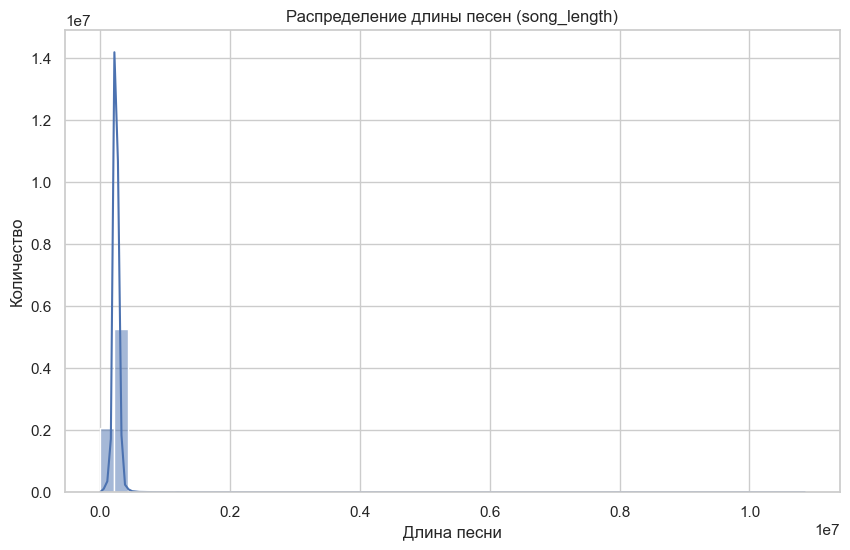

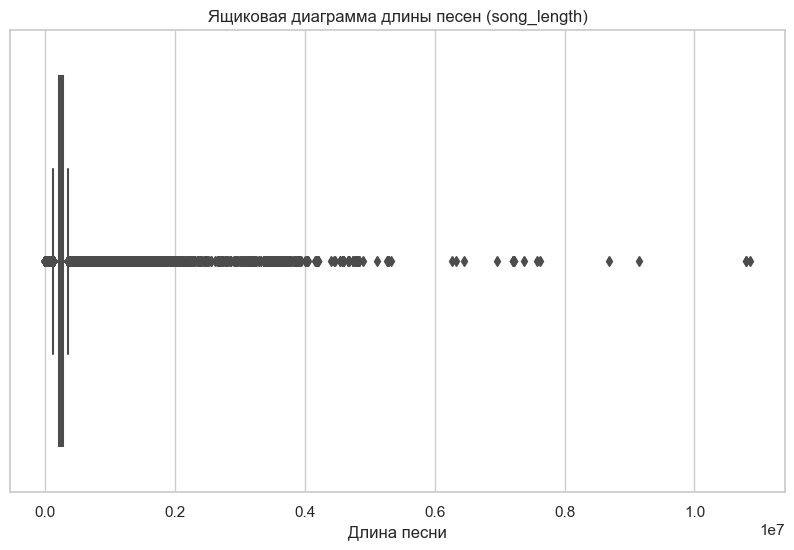

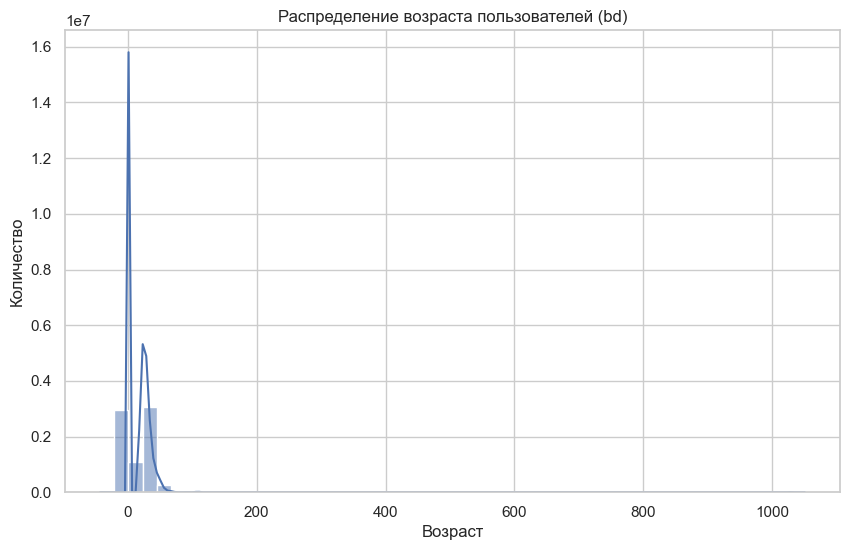

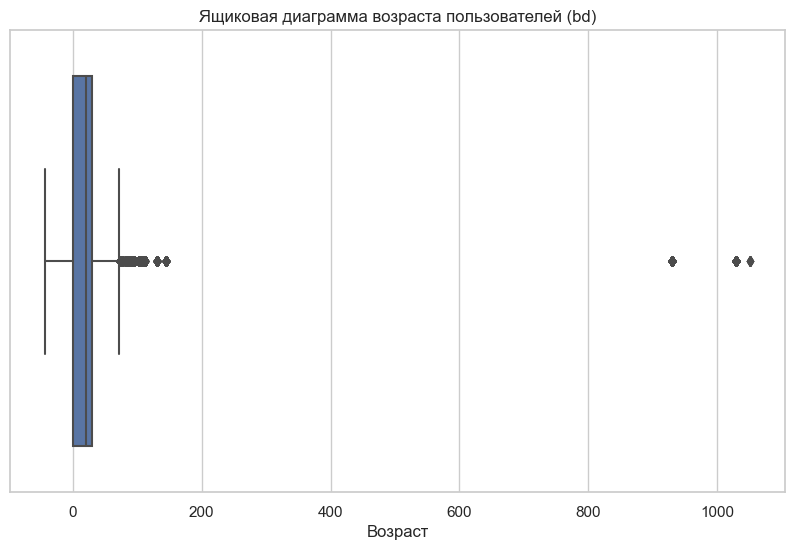

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установим стиль для графиков
sns.set(style="whitegrid")

# Гистограмма для song_length
plt.figure(figsize=(10, 6))
sns.histplot(full_df['song_length'], bins=50, kde=True)
plt.title('Распределение длины песен (song_length)')
plt.xlabel('Длина песни')
plt.ylabel('Количество')
plt.show()

# Ящиковая диаграмма для song_length
plt.figure(figsize=(10, 6))
sns.boxplot(x=full_df['song_length'])
plt.title('Ящиковая диаграмма длины песен (song_length)')
plt.xlabel('Длина песни')
plt.show()

# Гистограмма для bd
plt.figure(figsize=(10, 6))
sns.histplot(full_df['bd'], bins=50, kde=True)
plt.title('Распределение возраста пользователей (bd)')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Ящиковая диаграмма для bd
plt.figure(figsize=(10, 6))
sns.boxplot(x=full_df['bd'])
plt.title('Ящиковая диаграмма возраста пользователей (bd)')
plt.xlabel('Возраст')
plt.show()


По графикам видно, что распределения как длины песен (song_length), так и возраста пользователей (bd) содержат выбросы

Длина песен (song_length): На гистограмме и ящиковой диаграмме видны очень длинные треки, что нереалистично для обычной музыки. Возможно это аудиокниги или еще чтото, которые будут лишними в нашей задаче, так как мы рассматриваем песни.Поэтому я ограничу время 

Возраст пользователей (bd): На гистограмме видно, что большинство значений сосредоточено в районе более реалистичных цифр, но существуют также нереалистично высокие значения, которые могут быть ошибочными или аномальными, а также которые равны нулю, что невозможно, поэтому заполню нули средним значением а минусовые уберу.

In [27]:
# Ограничение длины песни пороговым значением в миллисекундах 15 минут 
full_df = full_df[(full_df['song_length'] <= 15*60*1000)]

# Ограничение возраста пользователей между 0 и 100 годами
full_df = full_df[(full_df['bd'] >= 0) & (full_df['bd'] <= 110)]

# Расчет медианы возраста для каждого города
median_bd_per_city = full_df[full_df['bd'] > 0].groupby('city')['bd'].median()

# Замена нулевых значений возраста на медиану возраста для соответствующего города
full_df['bd'] = full_df.apply(lambda row: median_bd_per_city[row['city']] if row['bd'] <= 0 else row['bd'], axis=1)



Теперь перейду к анализу категориальных переменных. Это поможет понять, как различные категории связаны с целевой переменной target

my library      3705361
discover        2176737
search           621956
radio            476027
listen with      212155
explore          167865
notification       6183
settings           2199
Name: source_system_tab, dtype: int64


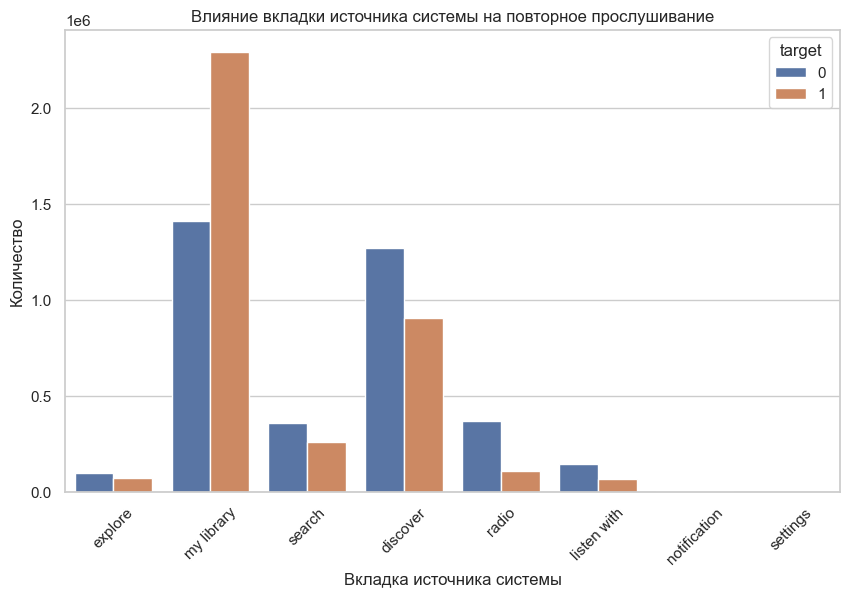

In [29]:
# Распределение source_system_tab
print(full_df['source_system_tab'].value_counts())

# Визуализация связи между source_system_tab и target
plt.figure(figsize=(10, 6))
sns.countplot(x='source_system_tab', hue='target', data=full_df)
plt.title('Влияние вкладки источника системы на повторное прослушивание')
plt.xlabel('Вкладка источника системы')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Видно, что большинство повторных прослушиваний происходит во вкладке my library, что указывает на то, что пользователи чаще всего возвращаются к музыке, сохраненной в их личной библиотеке. Это означает что люди склонны повторно слушают треки, которые они уже добавили в свою коллекцию. Вкладка discover также популярна для повторного прослушивания, что указывает на интерес к новой музыке. Вкладки search и radio имеют меньше повторных прослушиваний.
Дальше изученим source_screen_name, source_type, и gender для выявления тенденций, которые могут быть использованы при построении модели.

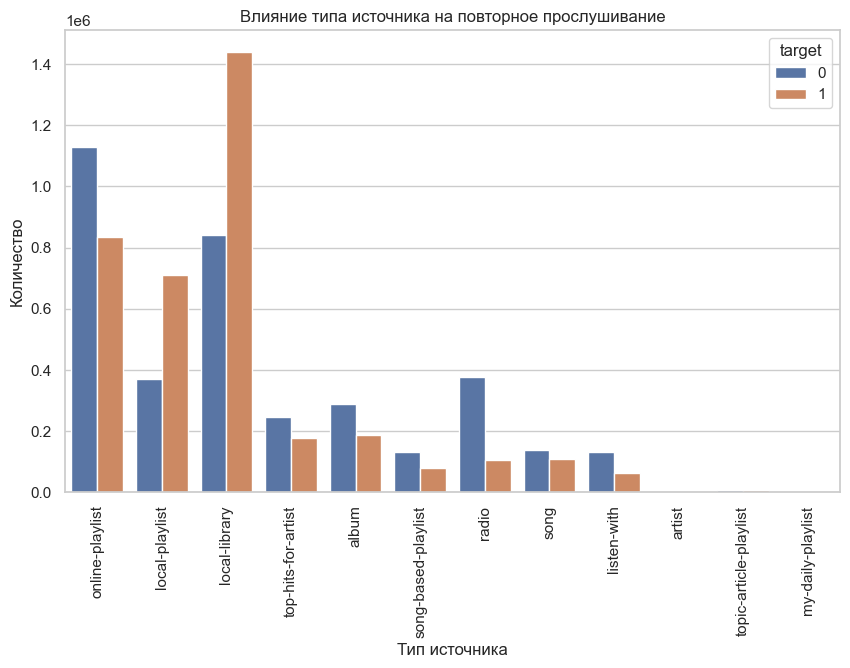

local-library             2280675
online-playlist           1965955
local-playlist            1078239
radio                      482442
album                      475962
top-hits-for-artist        422972
song                       244248
song-based-playlist        210347
listen-with                192756
topic-article-playlist      11193
artist                       3038
my-daily-playlist             656
Name: source_type, dtype: int64
Local playlist more     3639132
Online playlist more    1293390
Radio                    473811
Album more               418957
Search                   297827
Artist more              251996
Discover Feature         244082
Discover Chart           213556
Others profile more      201692
Discover Genre            81967
My library                75884
Explore                   72318
Unknown                   54125
Discover New              15952
Search Trends             13629
Search Home               13454
My library_Search          6441
Self profile mor

In [37]:
# Визуализация связи между source_type и target
plt.figure(figsize=(10, 6))
sns.countplot(x='source_type', hue='target', data=full_df)
plt.title('Влияние типа источника на повторное прослушивание')
plt.xlabel('Тип источника')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()
# Распределение source_type
print(full_df['source_type'].value_counts())
# Распределение source_screen_name
print(full_df['source_screen_name'].value_counts())


большинство повторных прослушиваний приходится на треки, воспроизведенные из локальной библиотеки (local-library). В большинстве случаев пользователи, которые слушают музыку из своей локальной библиотеки, склонны прослушивать её повторно. Плейлисты (online-playlist и local-playlist) также популярны для повторных прослушиваний.

Неизвестно    2958536
male          2295753
female        2114194
Name: gender, dtype: int64


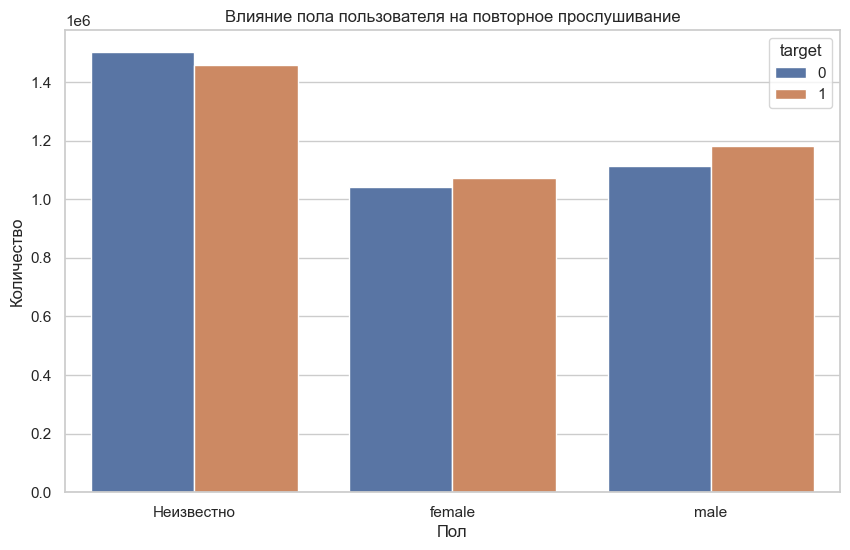

In [39]:
print(full_df['gender'].value_counts())
# Визуализация связи между gender и target
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='target', data=full_df)
plt.title('Влияние пола пользователя на повторное прослушивание')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()



Тут видно что нет большой разницы между полами и неизвестным значением, поэтому я просто уберу этот признак так как не будет значительного отличия

In [40]:
full_df.drop('gender',axis=1,inplace=True)

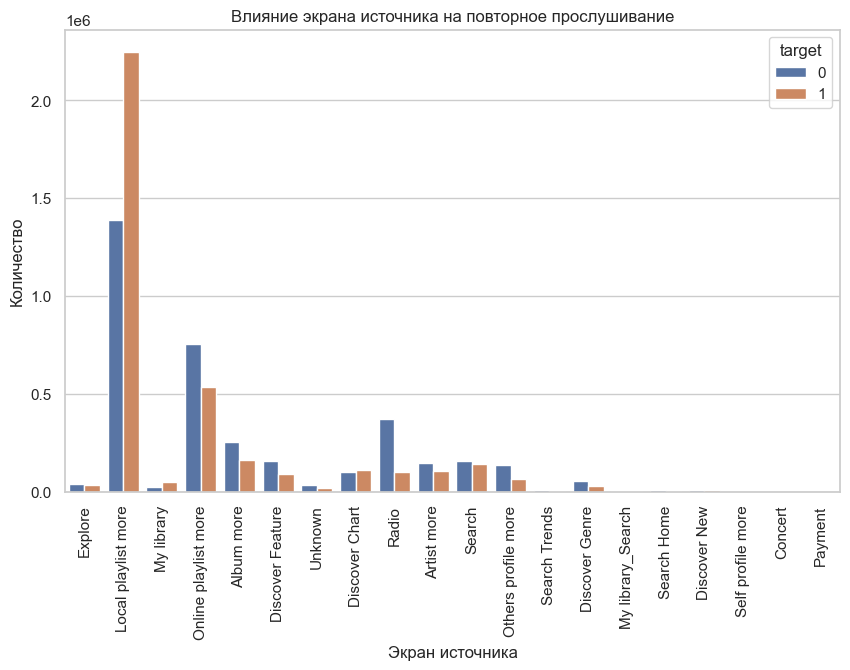

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='source_screen_name', hue='target', data=full_df)
plt.title('Влияние экрана источника на повторное прослушивание')
plt.xlabel('Экран источника')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()


"Local playlist more" и "Online playlist more" являются наиболее популярными экранами источников для повторного прослушивания, что может указывает на привычку пользователей к определенным плейлистам или предпочтение музыки, которую они уже знают.

Следующим шагом посмотрю на  registration_init_time и expiration_date. Это поможет понять, влияет ли длительность использования сервиса на вероятность повторного прослушивания.

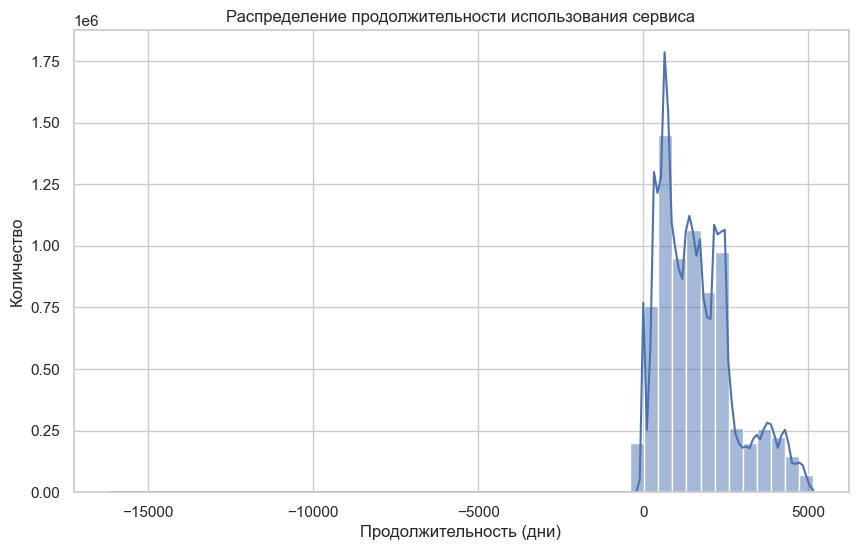

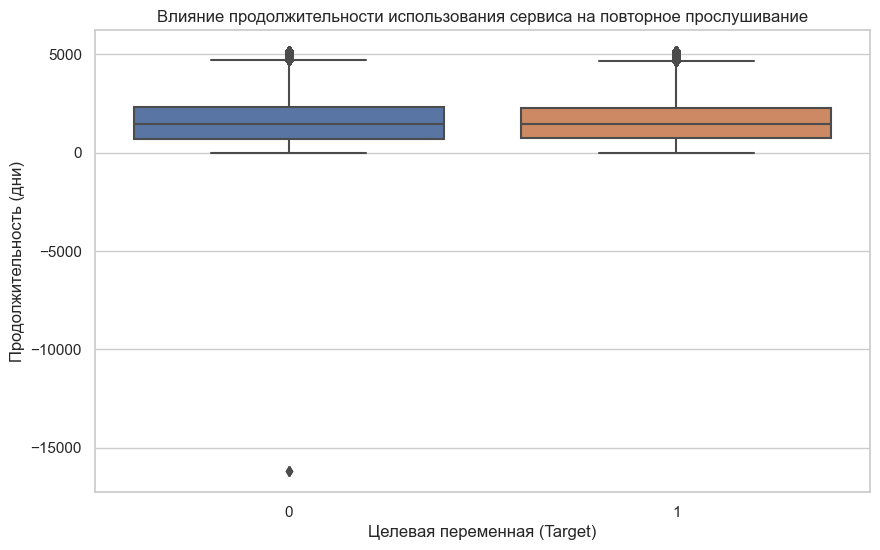

In [43]:
from datetime import datetime

# Преобразование в формат datetime
full_df['registration_init_time'] = pd.to_datetime(full_df['registration_init_time'], format='%Y%m%d')
full_df['expiration_date'] = pd.to_datetime(full_df['expiration_date'], format='%Y%m%d')

# Создание нового признака 'duration' как разницу в днях между expiration_date и registration_init_time
full_df['duration'] = (full_df['expiration_date'] - full_df['registration_init_time']).dt.days

# Визуализация продолжительности использования сервиса
plt.figure(figsize=(10, 6))
sns.histplot(full_df['duration'], bins=50, kde=True)
plt.title('Распределение продолжительности использования сервиса')
plt.xlabel('Продолжительность (дни)')
plt.ylabel('Количество')
plt.show()

# Анализ взаимосвязи между duration и target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='duration', data=full_df)
plt.title('Влияние продолжительности использования сервиса на повторное прослушивание')
plt.xlabel('Целевая переменная (Target)')
plt.ylabel('Продолжительность (дни)')
plt.show()


Гистограмма и ящиковая диаграмма продолжительности использования сервиса показывают некоторые аномальные значения, с отрицательной продолжительностью подписки, очистим эти значения.

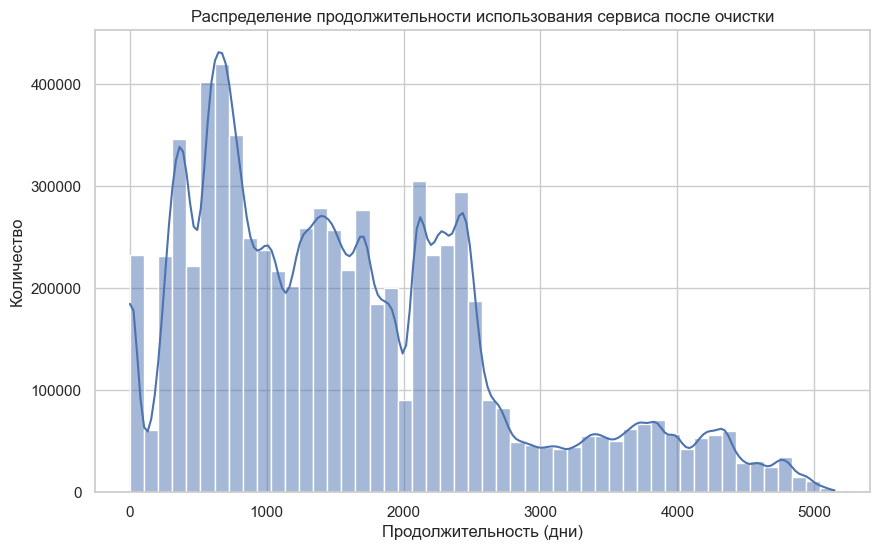

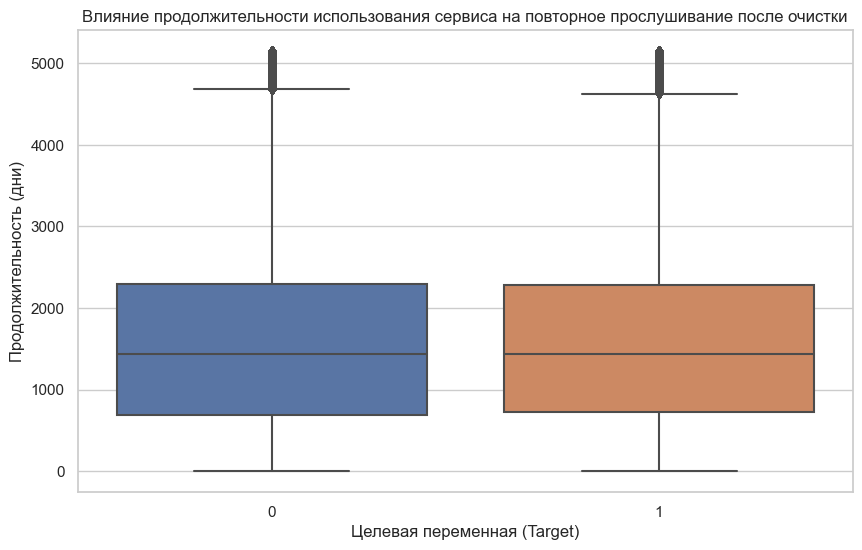

In [48]:
# Исключение некорректных значений (отрицательная продолжительность подписки)
df_cleaned = full_df[full_df['duration'] >= 0]
del full_df
# Повторный анализ с очищенными данными
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['duration'], bins=50, kde=True)
plt.title('Распределение продолжительности использования сервиса после очистки')
plt.xlabel('Продолжительность (дни)')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='duration', data=df_cleaned)
plt.title('Влияние продолжительности использования сервиса на повторное прослушивание после очистки')
plt.xlabel('Целевая переменная (Target)')
plt.ylabel('Продолжительность (дни)')
plt.show()

In [47]:
df_cleaned.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,city,bd,registered_via,registration_init_time,expiration_date,name,duration
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,52.0,1,23.0,7,2012-01-02,2017-10-05,Good Grief,2103
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,52.0,13,24.0,9,2011-05-25,2017-09-11,Lords of Cardboard,2301
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,52.0,13,24.0,9,2011-05-25,2017-09-11,Hip Hop Is Dead(Album Version (Edited)),2301
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,-1.0,13,24.0,9,2011-05-25,2017-09-11,Disco Africa,2301
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,52.0,1,23.0,7,2012-01-02,2017-10-05,Sleep Without You,2103


Ящиковая диаграмма также показывает, что у повторно прослушивающих пользователей в среднем более долгий срок подписки по сравнению с теми, кто не прослушивает треки повторно, к продолжительности я еще добавлю отдельные признаки даты 

In [49]:
# Для registration_init_time
df_cleaned['registration_year'] = df_cleaned['registration_init_time'].dt.year
df_cleaned['registration_month'] = df_cleaned['registration_init_time'].dt.month
df_cleaned['registration_day'] = df_cleaned['registration_init_time'].dt.day

# Для expiration_date
df_cleaned['expiration_year'] = df_cleaned['expiration_date'].dt.year
df_cleaned['expiration_month'] = df_cleaned['expiration_date'].dt.month
df_cleaned['expiration_day'] = df_cleaned['expiration_date'].dt.day

df_cleaned.drop(['registration_init_time', 'expiration_date'], axis=1, inplace=True)

In [50]:
df_cleaned.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,...,bd,registered_via,name,duration,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,52.0,...,23.0,7,Good Grief,2103,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,52.0,...,24.0,9,Lords of Cardboard,2301,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,52.0,...,24.0,9,Hip Hop Is Dead(Album Version (Edited)),2301,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,-1.0,...,24.0,9,Disco Africa,2301,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,52.0,...,23.0,7,Sleep Without You,2103,2012,1,2,2017,10,5


Для подготовки данных к обучению сделаю Label encoding для "object"

In [51]:
for col in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[col] = df_cleaned[col].astype('category')


for col in df_cleaned.select_dtypes(include=['category']).columns:
    df_cleaned[col] = df_cleaned[col].cat.codes

In [52]:
df_cleaned.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,...,bd,registered_via,name,duration,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
0,8154,74315,1,7,6,1,206471.0,283,3265,52.0,...,23.0,7,51212,2103,2012,1,2,2017,10,5
1,17250,222346,3,8,4,1,284584.0,89,31855,52.0,...,24.0,9,80984,2301,2011,5,25,2017,9,11
2,17250,120161,3,8,4,1,225396.0,89,21298,52.0,...,24.0,9,57048,2301,2011,5,25,2017,9,11
3,17250,23600,3,8,4,1,255512.0,6,27340,-1.0,...,24.0,9,34550,2301,2011,5,25,2017,9,11
4,8154,33150,1,7,6,1,187802.0,2,4456,52.0,...,23.0,7,121263,2103,2012,1,2,2017,10,5


Теперь приступим к обучению, сначала нужно разделить на тренировочные и тестовые данные

In [58]:
#Сначала чтобы не использовать весь датасет я рандомно возьму 30 процентов,и обучу через случайный лес и после получения результатов удалю наименее важные признаки, и потом уже использую на целом датасете, для конечного результата
df_sampled = df_cleaned.sample(frac=0.3, random_state=30)

In [59]:
from sklearn.model_selection import train_test_split

X = df_sampled.drop('target', axis=1)  # Отбрасываем целевую переменную для получения признаков
y = df_sampled['target']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели Случайного леса: {accuracy:.2f}')


Точность модели Случайного леса: 0.70


In [61]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feature_importances)

song_length           0.106290
name                  0.105117
song_id               0.104685
artist_name           0.094984
msno                  0.078337
duration              0.071820
registration_day      0.058508
expiration_day        0.054330
registration_month    0.040744
bd                    0.039580
source_type           0.037720
source_screen_name    0.034371
city                  0.031179
genre_ids             0.029920
expiration_month      0.026447
registration_year     0.024934
source_system_tab     0.024846
registered_via        0.014524
language              0.014506
expiration_year       0.007158
dtype: float64


In [64]:
#Уберу всё что ниже 0.029

threshold = 0.029
features_to_drop = feature_importances[feature_importances < threshold].index

df_dropped = df_cleaned.drop(features_to_drop, axis=1)

In [65]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7368480 entries, 0 to 7377417
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   msno                int16  
 1   song_id             int32  
 2   source_screen_name  int8   
 3   source_type         int8   
 4   target              int64  
 5   song_length         float64
 6   genre_ids           int16  
 7   artist_name         int32  
 8   city                int64  
 9   bd                  float64
 10  name                int32  
 11  duration            int64  
 12  registration_month  int64  
 13  registration_day    int64  
 14  expiration_day      int64  
dtypes: float64(2), int16(2), int32(3), int64(6), int8(2)
memory usage: 632.4 MB


In [ ]:
from sklearn.model_selection import train_test_split

X = df_dropped.drop('target', axis=1)  # Отбрасываем целевую переменную для получения признаков
y = df_dropped['target']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [66]:
#тренируем на послеобработанном датасете

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели Случайного леса: {accuracy:.2f}')


Точность модели Случайного леса: 0.70


In [75]:
# теперь использую xgboost и посмотрю на результаты
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Создание DMatrix для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Параметры модели
params = {
    'max_depth': 8,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'nthread': 4
}

# Обучение модели
xgb_model = xgb.train(params, dtrain, num_boost_round=200)

# Предсказания
y_pred_proba = xgb_model.predict(dtest)
y_pred = [1 if proba > 0.5 else 0 for proba in y_pred_proba]

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели XGBoost: {accuracy:.2f}')

Точность модели XGBoost: 0.69


In [76]:
!pip install catboost

In [78]:
# теперь проверим через catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Инициализация модели CatBoost
cb_model = CatBoostClassifier(iterations=150, learning_rate=0.2, depth=8, verbose=0, random_seed=42)

# Обучение модели
cb_model.fit(X_train, y_train)

# Предсказания на тестовом наборе данных
y_pred = cb_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели CatBoost: {accuracy:.2f}')

Точность модели CatBoost: 0.65


И так после проверки тремя моделями, я решил взять XGBOOST и сделать Grid search для выбора лучших параметров и последнего теста

In [79]:

from sklearn.model_selection import GridSearchCV

# Параметры для проверки
param_grid = {
    'max_depth': [8, 10,12],
    'eta': [0.3],
    'eval_metric': ['logloss', 'auc'],
    'objective': ['binary:logistic']
}

# Модель для GridSearchCV
model = xgb.XGBClassifier(n_estimators=200, nthread=4)

# Grid search с кросс-валидацией
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Запуск grid search
grid_search.fit(X_train, y_train)

# Лучшие параметры и лучшая точность
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

# Использование лучших параметров для обучения модели на всем обучающем наборе
best_params = grid_search.best_params_
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Предсказания на тестовом наборе данных с лучшей моделью
y_pred = best_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность лучшей модели XGBoost: {accuracy:.2f}')


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Лучшие параметры: {'eta': 0.3, 'eval_metric': 'logloss', 'max_depth': 12, 'objective': 'binary:logistic'}
Лучшая точность: 0.6923573666940008
Точность лучшей модели XGBoost: 0.70


In [80]:
# теперь использую xgboost и посмотрю на результаты
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Создание DMatrix для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)



# Обучение модели
xgb_model = xgb.train(best_params, dtrain, num_boost_round=250)

# Предсказания
y_pred_proba = xgb_model.predict(dtest)
y_pred = [1 if proba > 0.5 else 0 for proba in y_pred_proba]

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели XGBoost: {accuracy:.2f}')

Точность модели XGBoost: 0.70


Нахождение оптимального порога для улучшения предсказаний

In [85]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, accuracy_score, f1_score

y_pred_proba = xgb_model.predict(dtest)

# Вычисление ROC кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Нахождение оптимального порога: можно использовать разные критерии,
# например максимизацию f1-меры
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Оптимальный порог: {optimal_threshold:.2f}')

# Применение оптимального порога для классификации
y_pred_optimal = [1 if proba > optimal_threshold else 0 for proba in y_pred_proba]

accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f'Точность модели XGBoost с оптимальным порогом: {accuracy_optimal:.2f}')


Оптимальный порог: 0.53
Точность модели XGBoost с оптимальным порогом: 0.70


Теперь проверим свой скор через NDCG @20

In [81]:
import numpy as np

def ndcg_at_k(y_true, y_score, k=20):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    
    gains = 2 ** y_true - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    dcg = np.sum(gains / discounts)
    
    ideal_order = np.argsort(y_true)[::-1]
    ideal_y_true = np.take(y_true, ideal_order[:k])
    ideal_gains = 2 ** ideal_y_true - 1
    idcg = np.sum(ideal_gains / discounts)
    
    ndcg = dcg / idcg if idcg > 0 else 0
    return ndcg

In [86]:
y_test_array = y_test.to_numpy()  

# Вычисление NDCG@20
ndcg_score = ndcg_at_k(y_test_array, y_pred_optimal, k=20)
print(f'NDCG@20: {ndcg_score:.4f}')

NDCG@20: 0.8965
